In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import pickle # For saving models
import matplotlib.pyplot as plt # For plotting figures
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score

# For building our model
import keras
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
dataset = pd.read_csv('/content/hypothyroid (3).csv')
dataset.head()

,target,Age,Sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,...,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,f,f,f,f,f,f,f,...,y,0.6,y,15,y,1.48,y,10,n,?
1,hypothyroid,15,F,t,f,f,f,f,f,f,...,y,1.7,y,19,y,1.13,y,17,n,?
2,hypothyroid,24,M,f,f,f,f,f,f,f,...,y,0.2,y,4,y,1,y,0,n,?
3,hypothyroid,24,F,f,f,f,f,f,f,f,...,y,0.4,y,6,y,1.04,y,6,n,?
4,hypothyroid,77,M,f,f,f,f,f,f,f,...,y,1.2,y,57,y,1.28,y,44,n,?


In [ ]:
dataset.columns

Index(['target', 'Age', 'Sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4',
       'T4U_measured', 'T4U', 'FTI_measured', 'FTI', 'TBG_measured', 'TBG'],
      dtype='object')

In [ ]:
dataset["target"].value_counts()

,count
target,
negative,3012
hypothyroid,151


In [ ]:
dataset["target"] = dataset["target"].map({"negative":0,"hypothyroid":1})

In [ ]:
print("Unique categories in the column 'pregnant'", dataset['pregnant'].unique())
print("Count of categories in the column 'pregnant' \n", dataset["pregnant"].value_counts())

Unique categories in the column 'pregnant' ['f' 't']
Count of categories in the column 'pregnant' 
 pregnant
f    3100
t      63
Name: count, dtype: int64


In [ ]:
print("Unique categories in the column 'T3 measured'", dataset['T3_measured'].unique())
print("Count of categories in the column 'T3 measured' \n", dataset["T3_measured"].value_counts())

Unique categories in the column 'T3 measured' ['y' 'n']
Count of categories in the column 'T3 measured' 
 T3_measured
y    2468
n     695
Name: count, dtype: int64


In [ ]:
print("Unique categories in the column 'Sex'", dataset['Sex'].unique())
print("Count of categories in the column 'Sex' \n", dataset["Sex"].value_counts())

Unique categories in the column 'Sex' ['M' 'F' '?']
Count of categories in the column 'Sex' 
 Sex
F    2182
M     908
?      73
Name: count, dtype: int64


In [ ]:
# Replacing the categorical values into binary values
dataset = dataset.replace({'f':0,'t':1, 'y':1, 'n':0, 'M':0, 'F':1})

<ipython-input-9-b3fdbb603d40>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset = dataset.replace({'f':0,'t':1, 'y':1, 'n':0, 'M':0, 'F':1})


In [ ]:
# Displaying the head of the dataset
dataset.head()

,target,Age,Sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,...,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,1,72,0,0,0,0,0,0,0,0,...,1,0.6,1,15,1,1.48,1,10,0,?
1,1,15,1,1,0,0,0,0,0,0,...,1,1.7,1,19,1,1.13,1,17,0,?
2,1,24,0,0,0,0,0,0,0,0,...,1,0.2,1,4,1,1,1,0,0,?
3,1,24,1,0,0,0,0,0,0,0,...,1,0.4,1,6,1,1.04,1,6,0,?
4,1,77,0,0,0,0,0,0,0,0,...,1,1.2,1,57,1,1.28,1,44,0,?


In [ ]:
# Replacing ? into NaN values
dataset.replace(to_replace='?', inplace=True, value=np.NaN)

<ipython-input-11-bb179023cecc>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset.replace(to_replace='?', inplace=True, value=np.NaN)


In [ ]:
# Count the number of null values
dataset.isnull().sum()

,0
target,0
Age,446
Sex,73
on_thyroxine,0
query_on_thyroxine,0
on_antithyroid_medication,0
thyroid_surgery,0
query_hypothyroid,0
query_hyperthyroid,0
pregnant,0


In [ ]:
# Dropping the TBG column as it contains extremely high number of null values
dataset.drop('TBG', axis = 1, inplace=True)

In [ ]:
# Selecting columns with data type as 'object'
columns = dataset.columns[dataset.dtypes.eq('object')]

# Convert to numeric values
dataset[columns] = dataset[columns].apply(pd.to_numeric, errors='coerce')

In [ ]:
# Viewing the details
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3163 entries, 0 to 3162
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   target                     3163 non-null   int64  
 1   Age                        2717 non-null   float64
 2   Sex                        3090 non-null   float64
 3   on_thyroxine               3163 non-null   int64  
 4   query_on_thyroxine         3163 non-null   int64  
 5   on_antithyroid_medication  3163 non-null   int64  
 6   thyroid_surgery            3163 non-null   int64  
 7   query_hypothyroid          3163 non-null   int64  
 8   query_hyperthyroid         3163 non-null   int64  
 9   pregnant                   3163 non-null   int64  
 10  sick                       3163 non-null   int64  
 11  tumor                      3163 non-null   int64  
 12  lithium                    3163 non-null   int64  
 13  goitre                     3163 non-null   int64

In [ ]:
# List of columns containing null values
dataset.columns[dataset.isnull().any()].tolist()

['Age', 'Sex', 'TSH', 'T3', 'TT4', 'T4U', 'FTI']

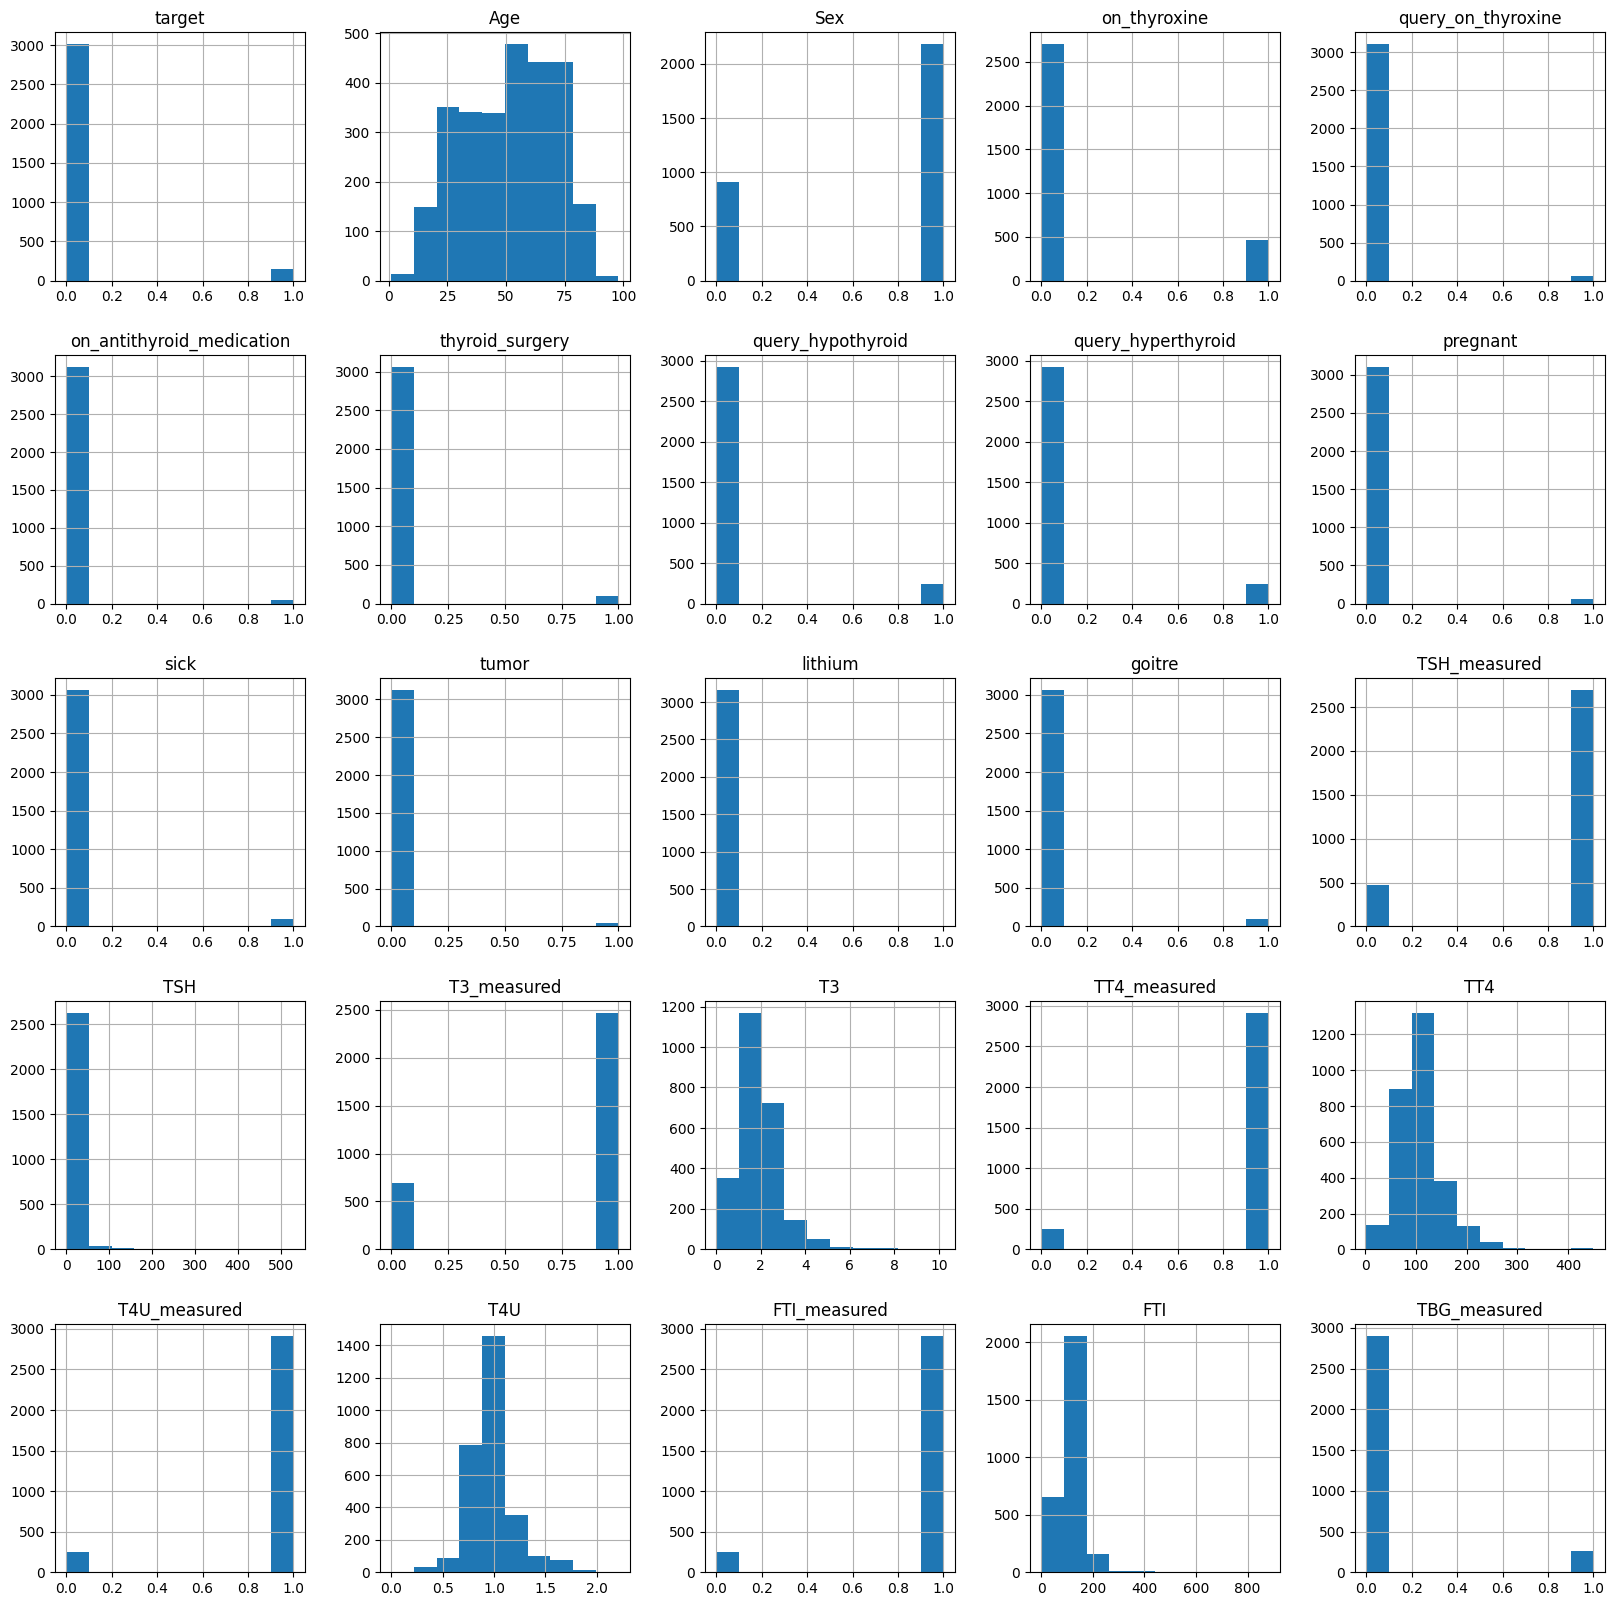

In [ ]:
dataset.hist(figsize = (20,20));

In [ ]:
#Based on the statistics plotted above, we can see that,

#The features "Age" and "T4U" show a normal distribution, which is why we will be replacing the missing values with mean.
#The features "TSH", "T3", "TT4" and "FTI" show a skewed distribution, which is why we will be replacing the missing values with median.
#The feature "gender" is binary and contains an imbalanced data with the values "1" much greater then "0". So we will be replacing the missing values with "0

# Replacing null values by mean
dataset['Age'].fillna(dataset['Age'].mean(), inplace = True)
dataset['T4U'].fillna(dataset['T4U'].mean(), inplace = True)

# Replacing null values by median
dataset['TSH'].fillna(dataset['TSH'].mean(), inplace = True)
dataset['T3'].fillna(dataset['T3'].median(), inplace = True)
dataset['TT4'].fillna(dataset['TT4'].median(), inplace = True)
dataset['FTI'].fillna(dataset['FTI'].median(), inplace = True)

# The gender data looks to be imbalanced with 0 lesser than 1
# Replacing null values with 0
dataset['Sex'].fillna(0, inplace = True)

<ipython-input-18-0b3d5ea9a537>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['Age'].fillna(dataset['Age'].mean(), inplace = True)
<ipython-input-18-0b3d5ea9a537>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True

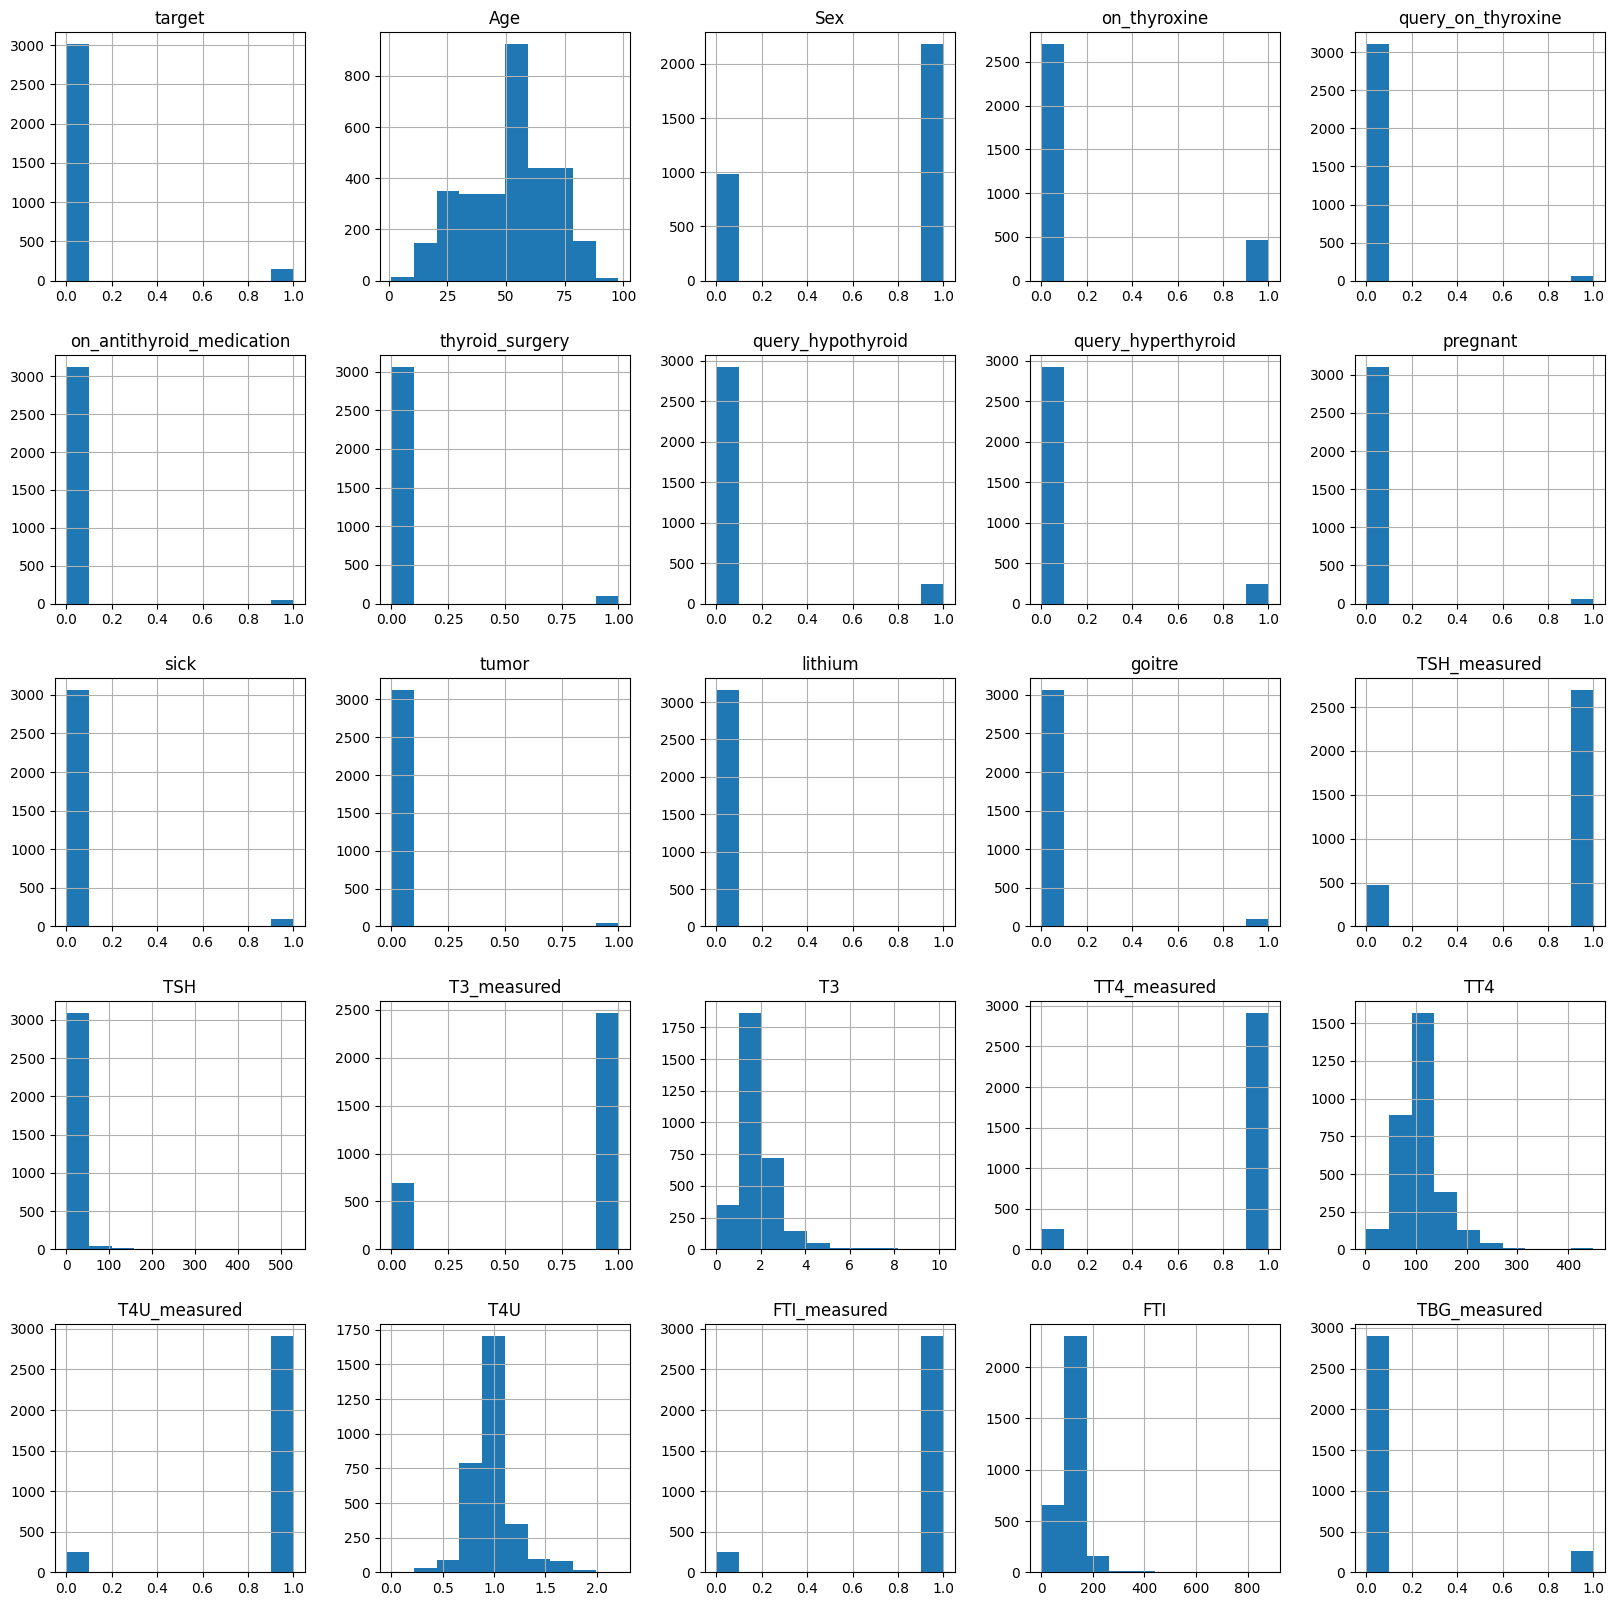

In [ ]:
# Plot the histogram of different features
plot_cleaned = dataset.hist(figsize = (20,20))

In [ ]:
# Check for the number of null values
dataset.isnull().sum()

,0
target,0
Age,0
Sex,0
on_thyroxine,0
query_on_thyroxine,0
on_antithyroid_medication,0
thyroid_surgery,0
query_hypothyroid,0
query_hyperthyroid,0
pregnant,0


In [ ]:
!pip install pycaret

In [ ]:
import pandas as pd
from pycaret.classification import setup, compare_models, blend_models, tune_model, pull, predict_model

# Initialize the PyCaret setup
clf_setup = setup(data=dataset, target='target', session_id=42)

,Description,Value
0,Session id,42
1,Target,target
2,Target type,Binary
3,Original data shape,"(3163, 25)"
4,Transformed data shape,"(3163, 25)"
5,Transformed train set shape,"(2214, 25)"
6,Transformed test set shape,"(949, 25)"
7,Numeric features,24
8,Preprocess,True
9,Imputation type,simple


In [ ]:
# Compare models and get the top 3 based on accuracy
top3_models = compare_models(n_select=3, sort='Accuracy')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
xgboost,Extreme Gradient Boosting,0.9878,0.9861,0.8591,0.8981,0.8718,0.8655,0.8691,0.1190
knn,K Neighbors Classifier,0.9864,0.9571,0.8000,0.9152,0.8466,0.8396,0.8455,0.0480
rf,Random Forest Classifier,0.9860,0.9856,0.8091,0.9028,0.8418,0.8346,0.8420,0.4460
ada,Ada Boost Classifier,0.9860,0.9596,0.8300,0.8768,0.8488,0.8415,0.8440,0.1600
gbc,Gradient Boosting Classifier,0.9846,0.9901,0.8400,0.8569,0.8417,0.8337,0.8374,0.2980
lightgbm,Light Gradient Boosting Machine,0.9846,0.9857,0.8136,0.8665,0.8328,0.8248,0.8287,0.8260
et,Extra Trees Classifier,0.9837,0.9844,0.7518,0.8995,0.8109,0.8026,0.8104,0.2190
lr,Logistic Regression,0.9810,0.9851,0.7164,0.8787,0.7751,0.7655,0.7772,0.5240
dt,Decision Tree Classifier,0.9801,0.8911,0.7927,0.8083,0.7976,0.7872,0.7888,0.0370
svm,SVM - Linear Kernel,0.9747,0.9840,0.7209,0.8156,0.7104,0.6986,0.7264,0.0390


Processing:   0%|          | 0/67 [00:00<?, ?it/s]

In [ ]:
# Print the names of the top 3 models
for i, model in enumerate(top3_models, 1):
    print(f"Model {i}: {model}")

Model 1: XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device='cpu', early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=-1,
              num_parallel_tree=None, objective='binary:logistic', ...)
Model 2: KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')
Model 3: RandomForestClass

In [ ]:
# Blend the top 3 models to create an ensemble
blended_model = blend_models(estimator_list=top3_models)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9865,0.9927,1.0000,0.7857,0.8800,0.8729,0.8801
1,0.9820,0.9647,0.6364,1.0000,0.7778,0.7689,0.7903
2,0.9820,0.9901,0.7273,0.8889,0.8000,0.7907,0.7950
3,0.9955,0.9991,1.0000,0.9167,0.9565,0.9542,0.9552
4,0.9819,0.9981,0.8000,0.8000,0.8000,0.7905,0.7905
5,0.9910,0.9995,0.8000,1.0000,0.8889,0.8842,0.8902
6,0.9955,0.9981,0.9000,1.0000,0.9474,0.9450,0.9464
7,0.9910,0.9938,0.8000,1.0000,0.8889,0.8842,0.8902
8,0.9910,0.9996,0.9091,0.9091,0.9091,0.9043,0.9043


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

In [ ]:
# Tune the blended model for better performance
tuned_blended_model = tune_model(blended_model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9865,0.9927,1.0000,0.7857,0.8800,0.8729,0.8801
1,0.9820,0.9642,0.6364,1.0000,0.7778,0.7689,0.7903
2,0.9820,0.9901,0.7273,0.8889,0.8000,0.7907,0.7950
3,0.9955,0.9991,1.0000,0.9167,0.9565,0.9542,0.9552
4,0.9864,0.9981,0.9000,0.8182,0.8571,0.8500,0.8511
5,0.9910,0.9991,0.8000,1.0000,0.8889,0.8842,0.8902
6,0.9955,0.9981,0.9000,1.0000,0.9474,0.9450,0.9464
7,0.9910,0.9943,0.8000,1.0000,0.8889,0.8842,0.8902
8,0.9955,0.9996,0.9091,1.0000,0.9524,0.9500,0.9512


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [ ]:
# Evaluate the blended model on the test set
tuned_results = pull()
print(tuned_results)

      Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
Fold                                                          
0       0.9865  0.9927  1.0000  0.7857  0.8800  0.8729  0.8801
1       0.9820  0.9642  0.6364  1.0000  0.7778  0.7689  0.7903
2       0.9820  0.9901  0.7273  0.8889  0.8000  0.7907  0.7950
3       0.9955  0.9991  1.0000  0.9167  0.9565  0.9542  0.9552
4       0.9864  0.9981  0.9000  0.8182  0.8571  0.8500  0.8511
5       0.9910  0.9991  0.8000  1.0000  0.8889  0.8842  0.8902
6       0.9955  0.9981  0.9000  1.0000  0.9474  0.9450  0.9464
7       0.9910  0.9943  0.8000  1.0000  0.8889  0.8842  0.8902
8       0.9955  0.9996  0.9091  1.0000  0.9524  0.9500  0.9512
9       0.9729  0.9370  0.8182  0.6923  0.7500  0.7358  0.7386
Mean    0.9878  0.9872  0.8491  0.9102  0.8699  0.8636  0.8688
Std     0.0070  0.0195  0.1096  0.1060  0.0700  0.0735  0.0708


**Explainable AI (XAI) **

In [ ]:
'''Interpretability: XAI makes the model's decisions interpretable, especially useful in medical fields where trust and understanding of how the model arrives at its decision are critical.
Trust and Transparency: Provides clinicians or stakeholders with insights into why the model classified a patient as hypothyroid or not, making the model more trustworthy.
Debugging: XAI helps in identifying which features are influencing predictions, allowing you to improve data quality or feature selection.'''
!pip install shap lime



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 5.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=8bebbb7d5c303048d0d59d7571f214fe43e3134cc5e7578e2b8197ba7fb5e5d0
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [ ]:
import shap

# Assuming `tuned_blended_model` is already trained and dataset is preprocessed
# Get the underlying trained model (if you use PyCaret, you can directly work with the models).
model = tuned_blended_model

# Access the individual estimators within the VotingClassifier
estimators = model.estimators_

# Choose one of the tree-based estimators (e.g., a RandomForest or XGBoost model)
tree_model = estimators[0] # Assuming the first estimator is tree-based

# Initialize the SHAP explainer with the selected tree-based model
explainer = shap.TreeExplainer(tree_model)

# Sample a subset of the dataset for computation efficiency
sample_data = dataset.sample(100, random_state=42)

# Compute SHAP values using the tree-based model
shap_values = explainer.shap_values(sample_data.drop('target', axis=1))

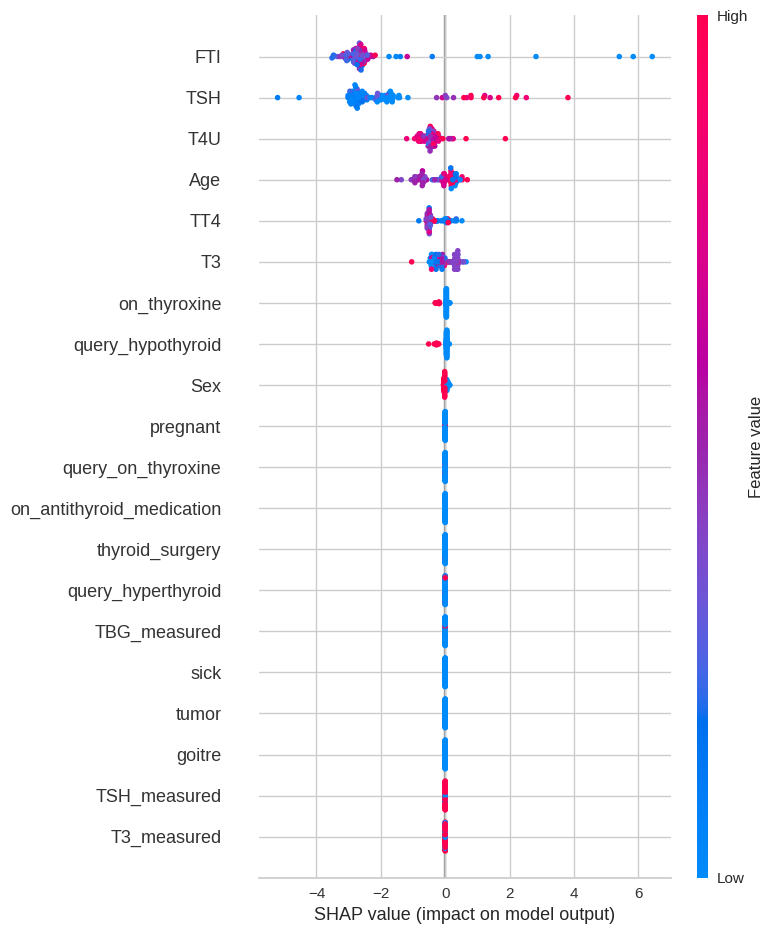

In [ ]:
shap.summary_plot(shap_values, sample_data.drop('target', axis=1))


In [ ]:
import shap

# Initialize the JavaScript environment
shap.initjs()

# Compute SHAP values
shap_values = explainer.shap_values(sample_data.drop('target', axis=1))

# Visualize the SHAP values for the first sample
shap.force_plot(explainer.expected_value, shap_values[0], sample_data.iloc[0, :-1])


**DEEP LEARNING**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# For TabNet
!pip install pytorch-tabnet
from pytorch_tabnet.tab_model import TabNetClassifier

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.5/44.5 kB 2.3 MB/s eta 0:00:00


In [ ]:
# Splitting the dataset
X = dataset.drop(columns=['target'])
y = dataset['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize result dictionary
results = {}

In [ ]:
### Model 1: ANN (Artificial Neural Network)
def create_ann_model():
    model = Sequential()
    model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Train ANN model with early stopping
ann_model = create_ann_model()
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
ann_model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, callbacks=[early_stopping], verbose=1)

# Evaluate ANN model
y_pred_ann = (ann_model.predict(X_test) > 0.5).astype("int32")
results["ANN"] = {
    "Accuracy": accuracy_score(y_test, y_pred_ann),
    "Precision": precision_score(y_test, y_pred_ann),
    "Recall": recall_score(y_test, y_pred_ann),
    "F1 Score": f1_score(y_test, y_pred_ann)
}


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


64/64 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7889 - loss: 0.5171 - val_accuracy: 0.9625 - val_loss: 0.1634
Epoch 2/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9538 - loss: 0.1994 - val_accuracy: 0.9723 - val_loss: 0.0840
Epoch 3/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9645 - loss: 0.1184 - val_accuracy: 0.9822 - val_loss: 0.0587
Epoch 4/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9839 - loss: 0.0660 - val_accuracy: 0.9862 - val_loss: 0.0495
Epoch 5/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9783 - loss: 0.0704 - val_accuracy: 0.9842 - val_loss: 0.0455
Epoch 6/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9712 - loss: 0.0860 - val_accuracy: 0.9862 - val_loss: 0.0429
Epoch 7/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9765 - loss: 0.0578 - val_accuracy: 0.9862 - val_loss: 0.0407
Epoch 8/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9784 - loss: 0.0572 - val_accuracy: 0.9783 - val_loss: 0.0396
Epo

In [ ]:
# Display results for each model
for model_name, metrics in results.items():
    print(f"{model_name} Model Performance:")
    for metric, value in metrics.items():
        print(f" - {metric}: {value:.4f}")
    print("\n")

ANN Model Performance:
 - Accuracy: 0.9779
 - Precision: 0.8710
 - Recall: 0.7297
 - F1 Score: 0.7941




In [ ]:
!pip install optuna


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 362.8/362.8 kB 29.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.2/233.2 kB 21.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 7.4 MB/s eta 0:00:00


In [ ]:
import optuna
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score

In [ ]:
# Define the objective function
def objective(trial):
    model = Sequential()

    # Define the number of layers and neurons
    n_layers = trial.suggest_int('n_layers', 1, 3)  # limit number of layers to prevent overfitting
    for i in range(n_layers):
        units = trial.suggest_int(f'n_units_l{i}', 32, 128)  # narrower range of units
        model.add(Dense(units, activation='relu'))
        dropout_rate = trial.suggest_float(f'dropout_l{i}', 0.1, 0.3)  # smaller dropout range
        model.add(Dropout(dropout_rate))

    # Output layer
    model.add(Dense(1, activation='sigmoid'))

    # Optimizer and learning rate
    learning_rate = trial.suggest_loguniform('learning_rate', 1e-4, 1e-2)
    optimizer = trial.suggest_categorical('optimizer', ['adam', 'rmsprop'])
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

    # Train the model
    early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
    history = model.fit(X_train, y_train, validation_split=0.2, epochs=50, batch_size=32,
                        callbacks=[early_stopping], verbose=0)

    # Evaluate the model
    y_pred = (model.predict(X_test) > 0.5).astype("int32")
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy


In [ ]:
# Run Optuna optimization
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=20)  # Experiment with 20 different hyperparameter combinations

# Display the best hyperparameters
print("Best Hyperparameters:", study.best_params)

# Train the model with best hyperparameters
best_params = study.best_params
model = Sequential()

# Add input layer with specified units for the first layer.
model.add(Dense(best_params['n_units_l0'], input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(best_params['dropout_l0']))

# Add hidden layers based on the best hyperparameters
for i in range(1, best_params['n_layers']):
    model.add(Dense(best_params[f'n_units_l{i}'], activation='relu'))
    model.add(Dropout(best_params[f'dropout_l{i}']))

# Output layer
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer=best_params['optimizer'], loss='binary_crossentropy', metrics=['accuracy'])

# Train the optimized model with early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2,
                    callbacks=[early_stopping], verbose=1)

# Evaluate the optimized model
y_pred = (model.predict(X_test) > 0.5).astype("int32")
accuracy = accuracy_score(y_test, y_pred)
print(f"Optimized Model Accuracy: {accuracy * 100:.4f}%")


[I 2024-11-03 10:44:22,040] A new study created in memory with name: no-name-12cbebb2-a992-4ab1-a1d0-f3359ae4410f


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


[I 2024-11-03 10:44:30,680] Trial 0 finished with value: 0.981042654028436 and parameters: {'n_layers': 3, 'n_units_l0': 95, 'dropout_l0': 0.17529020878486729, 'n_units_l1': 40, 'dropout_l1': 0.27268982823131716, 'n_units_l2': 87, 'dropout_l2': 0.2965467078983068, 'learning_rate': 0.0001247474233906229, 'optimizer': 'adam'}. Best is trial 0 with value: 0.981042654028436.


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


[I 2024-11-03 10:44:37,211] Trial 1 finished with value: 0.9778830963665087 and parameters: {'n_layers': 2, 'n_units_l0': 89, 'dropout_l0': 0.29658422382883587, 'n_units_l1': 119, 'dropout_l1': 0.1486230863379765, 'learning_rate': 0.000786879552148913, 'optimizer': 'adam'}. Best is trial 0 with value: 0.981042654028436.


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


[I 2024-11-03 10:44:42,621] Trial 2 finished with value: 0.976303317535545 and parameters: {'n_layers': 2, 'n_units_l0': 98, 'dropout_l0': 0.1935910386164107, 'n_units_l1': 52, 'dropout_l1': 0.13573790115185774, 'learning_rate': 0.004655902698212945, 'optimizer': 'adam'}. Best is trial 0 with value: 0.981042654028436.


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


[I 2024-11-03 10:44:47,687] Trial 3 finished with value: 0.9778830963665087 and parameters: {'n_layers': 2, 'n_units_l0': 117, 'dropout_l0': 0.29705790333368187, 'n_units_l1': 73, 'dropout_l1': 0.17144974878238722, 'learning_rate': 0.007154955565679675, 'optimizer': 'rmsprop'}. Best is trial 0 with value: 0.981042654028436.


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


[I 2024-11-03 10:44:53,143] Trial 4 finished with value: 0.9794628751974723 and parameters: {'n_layers': 1, 'n_units_l0': 125, 'dropout_l0': 0.2982769743473893, 'learning_rate': 0.0009258365994994704, 'optimizer': 'adam'}. Best is trial 0 with value: 0.981042654028436.


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


[I 2024-11-03 10:45:02,023] Trial 5 finished with value: 0.9842022116903634 and parameters: {'n_layers': 2, 'n_units_l0': 43, 'dropout_l0': 0.14238133313569928, 'n_units_l1': 103, 'dropout_l1': 0.26825073089596585, 'learning_rate': 0.009884624026386329, 'optimizer': 'adam'}. Best is trial 5 with value: 0.9842022116903634.


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


[I 2024-11-03 10:45:06,649] Trial 6 finished with value: 0.9778830963665087 and parameters: {'n_layers': 1, 'n_units_l0': 109, 'dropout_l0': 0.25659579060798654, 'learning_rate': 0.007461800838872486, 'optimizer': 'rmsprop'}. Best is trial 5 with value: 0.9842022116903634.


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


[I 2024-11-03 10:45:12,902] Trial 7 finished with value: 0.9778830963665087 and parameters: {'n_layers': 3, 'n_units_l0': 34, 'dropout_l0': 0.12890976399647133, 'n_units_l1': 48, 'dropout_l1': 0.23452712039609408, 'n_units_l2': 117, 'dropout_l2': 0.22389430640744262, 'learning_rate': 0.0009078417197168886, 'optimizer': 'rmsprop'}. Best is trial 5 with value: 0.9842022116903634.


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


[I 2024-11-03 10:45:18,912] Trial 8 finished with value: 0.9826224328593997 and parameters: {'n_layers': 2, 'n_units_l0': 110, 'dropout_l0': 0.13373087716638693, 'n_units_l1': 118, 'dropout_l1': 0.21900928295670646, 'learning_rate': 0.00017742189281872917, 'optimizer': 'adam'}. Best is trial 5 with value: 0.9842022116903634.


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


[I 2024-11-03 10:45:25,239] Trial 9 finished with value: 0.9778830963665087 and parameters: {'n_layers': 1, 'n_units_l0': 75, 'dropout_l0': 0.1649556882353746, 'learning_rate': 0.0024787723993180493, 'optimizer': 'rmsprop'}. Best is trial 5 with value: 0.9842022116903634.


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


[I 2024-11-03 10:45:32,938] Trial 10 finished with value: 0.976303317535545 and parameters: {'n_layers': 3, 'n_units_l0': 33, 'dropout_l0': 0.23368980495911013, 'n_units_l1': 91, 'dropout_l1': 0.2928610958789163, 'n_units_l2': 41, 'dropout_l2': 0.10654041002385432, 'learning_rate': 0.0026689415122236877, 'optimizer': 'adam'}. Best is trial 5 with value: 0.9842022116903634.


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


[I 2024-11-03 10:45:38,876] Trial 11 finished with value: 0.976303317535545 and parameters: {'n_layers': 2, 'n_units_l0': 62, 'dropout_l0': 0.10093913150047187, 'n_units_l1': 120, 'dropout_l1': 0.22450820840913388, 'learning_rate': 0.00014791612402453557, 'optimizer': 'adam'}. Best is trial 5 with value: 0.9842022116903634.


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


[I 2024-11-03 10:45:44,829] Trial 12 finished with value: 0.9778830963665087 and parameters: {'n_layers': 2, 'n_units_l0': 54, 'dropout_l0': 0.14528324096181847, 'n_units_l1': 100, 'dropout_l1': 0.24889792273752143, 'learning_rate': 0.00041182938692212564, 'optimizer': 'adam'}. Best is trial 5 with value: 0.9842022116903634.


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


[I 2024-11-03 10:45:52,857] Trial 13 finished with value: 0.9826224328593997 and parameters: {'n_layers': 2, 'n_units_l0': 73, 'dropout_l0': 0.10062267889213623, 'n_units_l1': 106, 'dropout_l1': 0.19424986577896347, 'learning_rate': 0.0003136206938196914, 'optimizer': 'adam'}. Best is trial 5 with value: 0.9842022116903634.


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


[I 2024-11-03 10:45:58,285] Trial 14 finished with value: 0.9747235387045814 and parameters: {'n_layers': 3, 'n_units_l0': 49, 'dropout_l0': 0.132007457826058, 'n_units_l1': 75, 'dropout_l1': 0.2619485596379212, 'n_units_l2': 32, 'dropout_l2': 0.10053205791146021, 'learning_rate': 0.00028341469769929955, 'optimizer': 'adam'}. Best is trial 5 with value: 0.9842022116903634.


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


[I 2024-11-03 10:46:05,514] Trial 15 finished with value: 0.9794628751974723 and parameters: {'n_layers': 1, 'n_units_l0': 106, 'dropout_l0': 0.21482366778029122, 'learning_rate': 0.0021717986110935616, 'optimizer': 'adam'}. Best is trial 5 with value: 0.9842022116903634.


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


[I 2024-11-03 10:46:10,510] Trial 16 finished with value: 0.9747235387045814 and parameters: {'n_layers': 2, 'n_units_l0': 82, 'dropout_l0': 0.15753324536257163, 'n_units_l1': 128, 'dropout_l1': 0.10111893036109287, 'learning_rate': 0.0005472482011462213, 'optimizer': 'adam'}. Best is trial 5 with value: 0.9842022116903634.


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


[I 2024-11-03 10:46:17,055] Trial 17 finished with value: 0.9794628751974723 and parameters: {'n_layers': 1, 'n_units_l0': 65, 'dropout_l0': 0.12852757854237404, 'learning_rate': 0.00018622400290003565, 'optimizer': 'adam'}. Best is trial 5 with value: 0.9842022116903634.


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


[I 2024-11-03 10:46:22,247] Trial 18 finished with value: 0.9794628751974723 and parameters: {'n_layers': 3, 'n_units_l0': 128, 'dropout_l0': 0.185955635423261, 'n_units_l1': 108, 'dropout_l1': 0.2175613948330744, 'n_units_l2': 122, 'dropout_l2': 0.19564535104848244, 'learning_rate': 0.0017633351882177044, 'optimizer': 'rmsprop'}. Best is trial 5 with value: 0.9842022116903634.


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


[I 2024-11-03 10:46:30,909] Trial 19 finished with value: 0.9778830963665087 and parameters: {'n_layers': 2, 'n_units_l0': 41, 'dropout_l0': 0.14962788941134508, 'n_units_l1': 88, 'dropout_l1': 0.2954563380870102, 'learning_rate': 0.0013165228578329974, 'optimizer': 'adam'}. Best is trial 5 with value: 0.9842022116903634.


Best Hyperparameters: {'n_layers': 2, 'n_units_l0': 43, 'dropout_l0': 0.14238133313569928, 'n_units_l1': 103, 'dropout_l1': 0.26825073089596585, 'learning_rate': 0.009884624026386329, 'optimizer': 'adam'}
Epoch 1/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8635 - loss: 0.4440 - val_accuracy: 0.9625 - val_loss: 0.1398
Epoch 2/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9584 - loss: 0.1425 - val_accuracy: 0.9783 - val_loss: 0.0812
Epoch 3/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9626 - loss: 0.0995 - val_accuracy: 0.9822 - val_loss: 0.0618
Epoch 4/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9801 - loss: 0.0605 - val_accuracy: 0.9842 - val_loss: 0.0547
Epoch 5/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9830 - loss: 0.0519 - val_accuracy: 0.9822 - val_loss: 0.0496
Epoch 6/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9825 - loss: 0.0669 - val_accuracy: 0.9822 - val_loss: 0.0480
Epoch 7/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 0

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, Dropout, Input
from tensorflow.keras.optimizers import Adam

X = dataset.drop(columns=['target'])
y = dataset['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train_reshaped = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test_reshaped = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

# Define RNN model
def create_rnn_model(input_shape, n_units=50, n_layers=2, dropout_rate=0.3, learning_rate=0.01):
    model = Sequential()

    # RNN layers
    for _ in range(n_layers - 1):
        model.add(SimpleRNN(units=n_units, activation='relu', return_sequences=True, input_shape=input_shape))
        model.add(Dropout(dropout_rate))

    # Last RNN layer without return_sequences
    model.add(SimpleRNN(units=n_units, activation='relu'))
    model.add(Dropout(dropout_rate))

    # Output layer
    model.add(Dense(1, activation='sigmoid'))

    # Compile the model
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Initialize and train the RNN model
input_shape = (1, X_train.shape[1])  # (timesteps=1, features)
model = create_rnn_model(input_shape=input_shape, n_units=50, n_layers=2, dropout_rate=0.3, learning_rate=0.001)

# Early stopping to avoid overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(X_train_reshaped, y_train, epochs=100, batch_size=32, validation_split=0.2, callbacks=[early_stopping], verbose=1)

# Evaluate the model
y_pred = (model.predict(X_test_reshaped) > 0.5).astype("int32")
accuracy = accuracy_score(y_test, y_pred)
print(f"Optimized RNN Model Accuracy: {accuracy * 100:.2f}%")


Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


64/64 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.9398 - loss: 0.3566 - val_accuracy: 0.9625 - val_loss: 0.1285
Epoch 2/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9553 - loss: 0.1458 - val_accuracy: 0.9684 - val_loss: 0.0748
Epoch 3/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9707 - loss: 0.0886 - val_accuracy: 0.9842 - val_loss: 0.0523
Epoch 4/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9735 - loss: 0.0783 - val_accuracy: 0.9842 - val_loss: 0.0450
Epoch 5/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9777 - loss: 0.0714 - val_accuracy: 0.9822 - val_loss: 0.0425
Epoch 6/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9765 - loss: 0.0622 - val_accuracy: 0.9822 - val_loss: 0.0404
Epoch 7/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9765 - loss: 0.0630 - val_accuracy: 0.9822 - val_loss: 0.0396
Epoch 8/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9774 - loss: 0.0522 - val_accuracy: 0.9783 - val_loss: 0.

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, Dropout, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd

# Assuming 'dataset' is already loaded and preprocessed with 'target' as the target variable

# Separate features and target
X = dataset.drop(columns=['target'])
y = dataset['target']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Reshape data for RNN input
X_train_reshaped = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test_reshaped = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

# Define RNN model with sigmoid activation
def create_rnn_model(input_shape, n_units=50, n_layers=2, dropout_rate=0.3, learning_rate=0.001):
    model = Sequential()

    # RNN layers with sigmoid activation
    for _ in range(n_layers - 1):
        model.add(SimpleRNN(units=n_units, activation='sigmoid', return_sequences=True, input_shape=input_shape))
        model.add(Dropout(dropout_rate))

    # Last RNN layer without return_sequences
    model.add(SimpleRNN(units=n_units, activation='sigmoid'))
    model.add(Dropout(dropout_rate))

    # Output layer with sigmoid activation for binary classification
    model.add(Dense(1, activation='sigmoid'))

    # Compile the model with Adam optimizer
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Initialize and train the RNN model
input_shape = (1, X_train.shape[1])  # (timesteps=1, features)
model = create_rnn_model(input_shape=input_shape, n_units=50, n_layers=2, dropout_rate=0.3, learning_rate=0.001)

# Early stopping to avoid overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(X_train_reshaped, y_train, epochs=100, batch_size=64, validation_split=0.2, callbacks=[early_stopping], verbose=1)

# Evaluate the model
y_pred = (model.predict(X_test_reshaped) > 0.5).astype("int32")
accuracy = accuracy_score(y_test, y_pred)
print(f"Optimized RNN Model Accuracy with Sigmoid Activation: {accuracy * 100:.2f}%")


Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.7018 - loss: 0.5611 - val_accuracy: 0.9625 - val_loss: 0.2133
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9518 - loss: 0.2284 - val_accuracy: 0.9625 - val_loss: 0.1618
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9574 - loss: 0.1851 - val_accuracy: 0.9625 - val_loss: 0.1497
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9505 - loss: 0.1900 - val_accuracy: 0.9625 - val_loss: 0.1419
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9504 - loss: 0.1796 - val_accuracy: 0.9625 - val_loss: 0.1348
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9548 - loss: 0.1553 - val_accuracy: 0.9625 - val_loss: 0.1280
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9539 - loss: 0.1582 - val_accuracy: 0.9625 - val_loss: 0.1215
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9571 - loss: 0.1405 - val_accuracy: 0.9625 - val_loss: 0.

In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assume 'dataset' is already loaded and preprocessed with 'target' as the target variable
X = dataset.drop(columns=['target'])
y = dataset['target']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Reshape data for LSTM input (samples, timesteps, features)
X_train_reshaped = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test_reshaped = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

# Define LSTM model function
def create_lstm_model(input_shape, n_units=64, dropout_rate=0.3, learning_rate=0.001):
    model = Sequential()
    model.add(LSTM(units=n_units, activation='relu', input_shape=input_shape, return_sequences=True))
    model.add(Dropout(dropout_rate))
    model.add(LSTM(units=n_units, activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1, activation='sigmoid'))

    # Compile model
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Set up input shape and create LSTM model
input_shape = (1, X_train.shape[1])
lstm_model = create_lstm_model(input_shape=input_shape, n_units=64, dropout_rate=0.3, learning_rate=0.0005)

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the LSTM model
history = lstm_model.fit(X_train_reshaped, y_train, epochs=100, batch_size=64, validation_split=0.2,
                         callbacks=[early_stopping], verbose=1)

# Evaluate the LSTM model
y_pred = (lstm_model.predict(X_test_reshaped) > 0.5).astype("int32")
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print performance metrics
print(f"LSTM Model Accuracy: {accuracy * 100:.2f}%")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - accuracy: 0.6157 - loss: 0.6898 - val_accuracy: 0.9625 - val_loss: 0.6571
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9540 - loss: 0.6432 - val_accuracy: 0.9625 - val_loss: 0.5813
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9538 - loss: 0.5521 - val_accuracy: 0.9625 - val_loss: 0.4321
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9541 - loss: 0.3964 - val_accuracy: 0.9625 - val_loss: 0.2617
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9492 - loss: 0.2379 - val_accuracy: 0.9625 - val_loss: 0.1375
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9535 - loss: 0.1385 - val_accuracy: 0.9625 - val_loss: 0.0922
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9560 - loss: 0.1029 - val_accuracy: 0.9644 - val_loss: 0.0770
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9525 - loss: 0.1020 - val_accuracy: 0.9664 - val_loss: 0.

**PRACTICE WITH DEEP LEARNING ALGOS**

In [ ]:
### Model 1: ANN (Artificial Neural Network)
def create_ann_model():
    model = Sequential()
    model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Train ANN model with early stopping
ann_model = create_ann_model()
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
ann_model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, callbacks=[early_stopping], verbose=1)

# Evaluate ANN model
y_pred_ann = (ann_model.predict(X_test) > 0.5).astype("int32")
results["ANN"] = {
    "Accuracy": accuracy_score(y_test, y_pred_ann),
    "Precision": precision_score(y_test, y_pred_ann),
    "Recall": recall_score(y_test, y_pred_ann),
    "F1 Score": f1_score(y_test, y_pred_ann)
}


Epoch 1/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 7s 43ms/step - accuracy: 0.6266 - loss: 0.6466 - val_accuracy: 0.9625 - val_loss: 0.1887
Epoch 2/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9511 - loss: 0.2041 - val_accuracy: 0.9625 - val_loss: 0.0975
Epoch 3/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9587 - loss: 0.1310 - val_accuracy: 0.9783 - val_loss: 0.0660
Epoch 4/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9744 - loss: 0.0775 - val_accuracy: 0.9862 - val_loss: 0.0546
Epoch 5/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9748 - loss: 0.0751 - val_accuracy: 0.9862 - val_loss: 0.0492
Epoch 6/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9820 - loss: 0.0597 - val_accuracy: 0.9822 - val_loss: 0.0467
Epoch 7/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9764 - loss: 0.0641 - val_accuracy: 0.9822 - val_loss: 0.0449
Epoch 8/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9738 - loss: 0.0733 - val_accuracy: 0.9822 - val_loss

In [ ]:
# Display results for each model
for model_name, metrics in results.items():
    print(f"{model_name} Model Performance:")
    for metric, value in metrics.items():
        print(f" - {metric}: {value:.4f}")
    print("\n")

ANN Model Performance:
 - Accuracy: 0.9795
 - Precision: 0.9000
 - Recall: 0.7297
 - F1 Score: 0.8060




**NOW PRACTICE WITH RNN**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, Dropout, Input
from tensorflow.keras.optimizers import Adam

X = dataset.drop(columns=['target'])
y = dataset['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train_reshaped = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test_reshaped = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

# Define RNN model
def create_rnn_model(input_shape, n_units=50, n_layers=2, dropout_rate=0.3, learning_rate=0.01):
    model = Sequential()

    # RNN layers
    for _ in range(n_layers - 1):
        model.add(SimpleRNN(units=n_units, activation='relu', return_sequences=True, input_shape=input_shape))
        model.add(Dropout(dropout_rate))

    # Last RNN layer without return_sequences
    model.add(SimpleRNN(units=n_units, activation='relu'))
    model.add(Dropout(dropout_rate))

    # Output layer
    model.add(Dense(1, activation='sigmoid'))

    # Compile the model
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Initialize and train the RNN model
input_shape = (1, X_train.shape[1])  # (timesteps=1, features)
model = create_rnn_model(input_shape=input_shape, n_units=50, n_layers=2, dropout_rate=0.3, learning_rate=0.001)

# Early stopping to avoid overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(X_train_reshaped, y_train, epochs=100, batch_size=32, validation_split=0.2, callbacks=[early_stopping], verbose=1)

# Evaluate the model
y_pred = (model.predict(X_test_reshaped) > 0.5).astype("int32")
accuracy = accuracy_score(y_test, y_pred)
print(f"Optimized RNN Model Accuracy: {accuracy * 100:.2f}%")


Epoch 1/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 11s 75ms/step - accuracy: 0.7060 - loss: 0.5467 - val_accuracy: 0.9625 - val_loss: 0.1706
Epoch 2/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9604 - loss: 0.1719 - val_accuracy: 0.9723 - val_loss: 0.0924
Epoch 3/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9704 - loss: 0.1048 - val_accuracy: 0.9822 - val_loss: 0.0645
Epoch 4/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9761 - loss: 0.0880 - val_accuracy: 0.9862 - val_loss: 0.0519
Epoch 5/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9713 - loss: 0.0763 - val_accuracy: 0.9862 - val_loss: 0.0479
Epoch 6/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9773 - loss: 0.0582 - val_accuracy: 0.9862 - val_loss: 0.0441
Epoch 7/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9811 - loss: 0.0551 - val_accuracy: 0.9842 - val_loss: 0.0405
Epoch 8/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9799 - loss: 0.0521 - val_accuracy: 0.9842 -

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, Dropout, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd

# Assuming 'dataset' is already loaded and preprocessed with 'target' as the target variable

# Separate features and target
X = dataset.drop(columns=['target'])
y = dataset['target']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Reshape data for RNN input
X_train_reshaped = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test_reshaped = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

# Define RNN model with sigmoid activation
def create_rnn_model(input_shape, n_units=50, n_layers=2, dropout_rate=0.3, learning_rate=0.001):
    model = Sequential()

    # RNN layers with sigmoid activation
    for _ in range(n_layers - 1):
        model.add(SimpleRNN(units=n_units, activation='sigmoid', return_sequences=True, input_shape=input_shape))
        model.add(Dropout(dropout_rate))

    # Last RNN layer without return_sequences
    model.add(SimpleRNN(units=n_units, activation='sigmoid'))
    model.add(Dropout(dropout_rate))

    # Output layer with sigmoid activation for binary classification
    model.add(Dense(1, activation='sigmoid'))

    # Compile the model with Adam optimizer
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Initialize and train the RNN model
input_shape = (1, X_train.shape[1])  # (timesteps=1, features)
model = create_rnn_model(input_shape=input_shape, n_units=50, n_layers=2, dropout_rate=0.3, learning_rate=0.001)

# Early stopping to avoid overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(X_train_reshaped, y_train, epochs=100, batch_size=64, validation_split=0.2, callbacks=[early_stopping], verbose=1)

# Evaluate the model
y_pred = (model.predict(X_test_reshaped) > 0.5).astype("int32")
accuracy = accuracy_score(y_test, y_pred)
print(f"Optimized RNN Model Accuracy with Sigmoid Activation: {accuracy * 100:.2f}%")


Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 9s 126ms/step - accuracy: 0.5349 - loss: 0.6989 - val_accuracy: 0.9625 - val_loss: 0.2354
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9475 - loss: 0.2554 - val_accuracy: 0.9625 - val_loss: 0.1647
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9563 - loss: 0.1881 - val_accuracy: 0.9625 - val_loss: 0.1500
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9576 - loss: 0.1721 - val_accuracy: 0.9625 - val_loss: 0.1420
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9526 - loss: 0.1768 - val_accuracy: 0.9625 - val_loss: 0.1349
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9526 - loss: 0.1671 - val_accuracy: 0.9625 - val_loss: 0.1285
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9580 - loss: 0.1486 - val_accuracy: 0.9625 - val_loss: 0.1225
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9502 - loss: 0.1530 - val_accuracy: 0.9625 -

In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assume 'dataset' is already loaded and preprocessed with 'target' as the target variable
X = dataset.drop(columns=['target'])
y = dataset['target']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Reshape data for LSTM input (samples, timesteps, features)
X_train_reshaped = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test_reshaped = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

# Define LSTM model function
def create_lstm_model(input_shape, n_units=64, dropout_rate=0.3, learning_rate=0.001):
    model = Sequential()
    model.add(LSTM(units=n_units, activation='relu', input_shape=input_shape, return_sequences=True))
    model.add(Dropout(dropout_rate))
    model.add(LSTM(units=n_units, activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1, activation='sigmoid'))

    # Compile model
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Set up input shape and create LSTM model
input_shape = (1, X_train.shape[1])
lstm_model = create_lstm_model(input_shape=input_shape, n_units=64, dropout_rate=0.3, learning_rate=0.0005)

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the LSTM model
history = lstm_model.fit(X_train_reshaped, y_train, epochs=120, batch_size=64, validation_split=0.2,
                         callbacks=[early_stopping], verbose=1)

# Evaluate the LSTM model
y_pred = (lstm_model.predict(X_test_reshaped) > 0.5).astype("int32")
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print performance metrics
print(f"LSTM Model Accuracy: {accuracy * 100:.2f}%")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/120
32/32 ━━━━━━━━━━━━━━━━━━━━ 14s 38ms/step - accuracy: 0.8832 - loss: 0.6806 - val_accuracy: 0.9625 - val_loss: 0.6419
Epoch 2/120
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9531 - loss: 0.6238 - val_accuracy: 0.9625 - val_loss: 0.5422
Epoch 3/120
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9593 - loss: 0.5038 - val_accuracy: 0.9625 - val_loss: 0.3671
Epoch 4/120
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9517 - loss: 0.3238 - val_accuracy: 0.9625 - val_loss: 0.1909
Epoch 5/120
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9559 - loss: 0.1784 - val_accuracy: 0.9625 - val_loss: 0.1108
Epoch 6/120
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9540 - loss: 0.1286 - val_accuracy: 0.9625 - val_loss: 0.0875
Epoch 7/120
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9485 - loss: 0.1119 - val_accuracy: 0.9625 - val_loss: 0.0774
Epoch 8/120
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9490 - loss: 0.1014 - val_accuracy: 0.